# Optična rotacija v sladkorni vodi

## Uvod

Optična rotacija je pojav, kjer kiralne molekule, kot so saharoza, zavrtijo ravnino polarizirane svetlobe. Ta pojav je odvisen od:
- koncentracije snovi \(c\),
- dolžine poti svetlobe \(l\),
- valovne dolžine svetlobe \($\lambda$).

## Osnovna enačba

Kot rotacije $\alpha$ je povezan s specifično rotacijo $[\alpha]_\lambda$ preko:

$\alpha(\lambda) = [\alpha]_\lambda \cdot c \cdot l$

Specifična rotacija je funkcija valovne dolžine in jo lahko približamo z Drudejevim modelom:


$[\alpha](\lambda) = \frac{k \lambda^2}{\lambda^2 - A^2}$

kjer sta \(k\) in \(A\) parametra, ki ju bomo določili s prilagajanjem modela na meritve.

## Namen eksperimenta

Merili bomo kot rotacije za različne koncentracije saharoze pri dveh valovnih dolžinah (rdeča ~650 nm, zelena ~532 nm). Poleg tega bomo primerjali dve vrsti medu, naravnega in sintetičnega, da pokažemo razliko v optični aktivnosti.

# Korak 2: Priprava podatkov za eksperiment in zapis napak

---

## 1. Meritve in negotovosti

**Merjene količine:**
- Koncentracija saharoze, $c$ (npr. v g/mL)
- Valovna dolžina, $\lambda$ (v nm, poznana od lasera)
- Kot rotacije, $\alpha$ (v stopinjah, iz polarimetra)

**Negotovosti:**
- Absolutna napaka koncentracije, $\Delta c$  
  Primer: če tehtnica meri s 0.001 g natančnostjo in pripravljaš raztopino, oceni to napako.
- Absolutna napaka kota rotacije, $\Delta \alpha$  
  Podatki od polarimetra (npr. ±0.05°) ali ocena glede na merilni instrument.
- Napaka valovne dolžine ni potrebna, če uporabljaš laserske diode, ker so valovne dolžine zelo točne.

---

## 2. Postopek priprave podatkov z napakami

Izpis meritve z napako:

$$
c \pm \Delta c, \quad \lambda, \quad \alpha \pm \Delta \alpha
$$

**Primer (za eno meritev):**

| koncentracija (g/mL) | napaka koncentracije (g/mL) | valovna dolžina (nm) | kot rotacije (°) | napaka kota (°) |
|----------------------|-----------------------------|----------------------|------------------|-----------------|
| 0.05                 | 0.001                       | 650                  | 3.50             | 0.05            |

---

## 3. Enačbe za nadaljnjo analizo

Kot rotacije je povezan s koncentracijo in dolžino poti (zaenkrat je dolžina poti konstantna, npr. 1 dm):

$$
\alpha = [\alpha]_\lambda \cdot c \cdot l
$$

Če boš meril pri različnih koncentracijah, lahko izračunaš specifično rotacijo $[\alpha]_\lambda$ s formulo:

$$
[\alpha]_\lambda = \frac{\alpha}{c \cdot l}
$$

---


---

## 5. Primer navodil za pripravo podatkov

1. Pripravi sladkorno raztopino različnih koncentracij $c$ (npr. 0.01, 0.03, 0.05 g/mL). Pri pripravi upoštevaj merilno napako tehtnice ali volumna.
2. Izmeri kot rotacije $\alpha$ pri vsaki koncentraciji za laserja z valovnimi dolžinami $\lambda_1 = 650\, \mathrm{nm}$ in $\lambda_2 = 532\, \mathrm{nm}$.
3. Zapiši meritve v tabelo z vsemi vrednostmi in njihovimi napakami.
4. Izračunaj specifično rotacijo po formuli zgoraj ter izračunaj njeno negotovost.

---



$[\alpha](\lambda) = \frac{k \lambda^2}{\lambda^2 - A^2}$


# Analiza specifične rotacije z uporabo Drudejeve enačbe

Merili smo specifično rotacijo $[\alpha](\lambda)$ pri različnih valovnih dolžinah. Za te podatke želimo določiti konstanti $k$ in $A$, ki opisujeta disperzijo optične aktivnosti po enačbi:

$$
[\alpha](\lambda) = \frac{k \lambda^2}{\lambda^2 - A^2}
$$

kjer je:
- $\lambda$ valovna dolžina (v nm),
- $[\alpha](\lambda)$ specifična rotacija (v ° / (g/mL·dm)),
- $k$, $A$ sta konstanti, ki ju bomo določili z ujemanjem.

Spodaj izvedemo nelinearno prileganje (curve fitting) z uporabo `scipy.optimize.curve_fit`.


In [25]:
# Uvoz knjižnic
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Podatki iz eksperimenta

Zabeležili smo naslednje podatke:
- koncentracija je enaka za vse meritve, zato lahko primerjamo le specifično rotacijo.

In [26]:
# Podatki (lambda v nm, alpha v deg/(g/mL·dm))
lambda_vals = np.array([532, 589, 650])  # nm
alpha_vals = np.array([25.2, 20.0, 17.1])  # specifična rotacija

# Če imaš napake, lahko dodaš:
# alpha_err = np.array([0.3, 0.3, 0.3])

## Definicija modela

Uporabimo model:

$$
[\alpha](\lambda) = \frac{k \lambda^2}{\lambda^2 - A^2}
$$

In [27]:
# Drudejeva enačba
def drude_model(lam, k, A):
    return (k * lam**2) / (lam**2 - A**2)

## Prileganje modela eksperimentalnim podatkom

In [28]:
# Tu vnesemo svoje podatke
lambda_vals = np.array([650, 590, 532, 480])  # valovne dolžine v nm
lambda_errs = np.array([5, 5, 5, 5])  # napake valovnih dolžin
alpha_vals = np.array([15.2, 16.7, 18.4, 19.9])  # specifična rotacija
alpha_errs = np.array([0.3, 0.3, 0.3, 0.3])      # napake specifične rotacije


Ujemajoči parametri:
  k = 12.25 ± 0.35
  A = 300.36 ± 8.90 nm


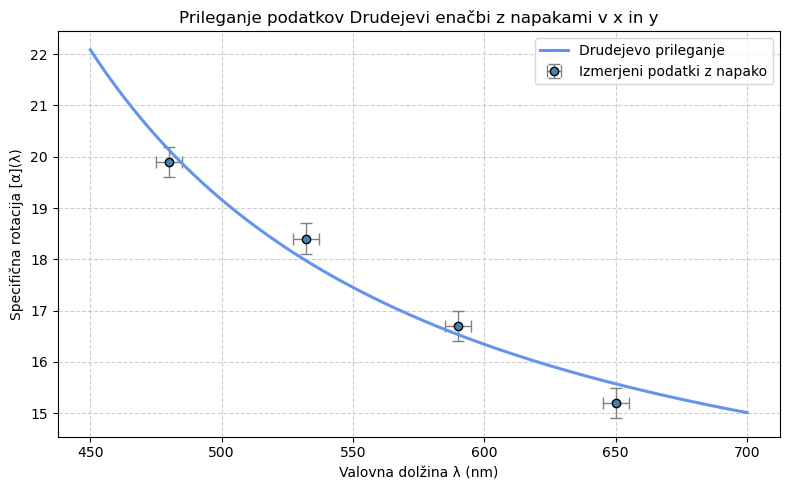

In [30]:
# Uvozimo potrebne knjižnice
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Drudejeva funkcija
def drude(lambda_nm, k, A):
    return (k * lambda_nm**2) / (lambda_nm**2 - A**2)


# Prileganje z upoštevanjem napak v y (x napake ne vplivajo na fit)
params, cov = curve_fit(drude, lambda_vals, alpha_vals, sigma=alpha_errs, absolute_sigma=True, p0=(1e4, 200))
k_fit, A_fit = params
k_err, A_err = np.sqrt(np.diag(cov))

# Izpis rezultatov
print("Ujemajoči parametri:")
print(f"  k = {k_fit:.2f} ± {k_err:.2f}")
print(f"  A = {A_fit:.2f} ± {A_err:.2f} nm")

# Priprava za prikaz prileganja
lambda_fit = np.linspace(450, 700, 300)
alpha_fit = drude(lambda_fit, k_fit, A_fit)

# Risanje grafa z error bar-i v obeh smereh
plt.figure(figsize=(8, 5))

plt.errorbar(
    lambda_vals,
    alpha_vals,
    xerr=lambda_errs,
    yerr=alpha_errs,
    fmt='o',
    markersize=6,
    markerfacecolor='steelblue',
    markeredgecolor='black',
    ecolor='gray',
    elinewidth=1,
    capsize=4,
    label='Izmerjeni podatki z napako'
)

# Prileganje funkcije
plt.plot(lambda_fit, alpha_fit, color='cornflowerblue', linewidth=2.2, label='Drudejevo prileganje')

# Oznake in estetika
plt.xlabel('Valovna dolžina λ (nm)')
plt.ylabel('Specifična rotacija [α](λ)')
plt.title('Prileganje podatkov Drudejevi enačbi z napakami v x in y')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()